# Inhaltsverzeichnis

| Abschnitt |
|-----------|
| [Monatliche Brandhäufigkeiten nach Jahr](#monatliche-brandhaeufigkeiten-nach-jahr) |


# Monatliche Brandhäufigkeiten nach Jahr

Dieser Code visualisiert die **monatlichen Brandhäufigkeiten** für verschiedene Jahre:
- Verwendet die Daten aus der Datei `monthly_fire_counts.csv`.
- Gruppiert die Daten nach Jahr und Monat und summiert die Anzahl der Brände.
- Erstellt eine Pivot-Tabelle, um die Brände für jeden Monat und jedes Jahr darzustellen.
- Plottet die Brände für jeden Monat (x-Achse) und jedes Jahr als separate Linien.

Die resultierende Abbildung wird im Ordner **Abbildungen** unter dem Namen `monthly_fire_frequency_by_year.png` gespeichert.


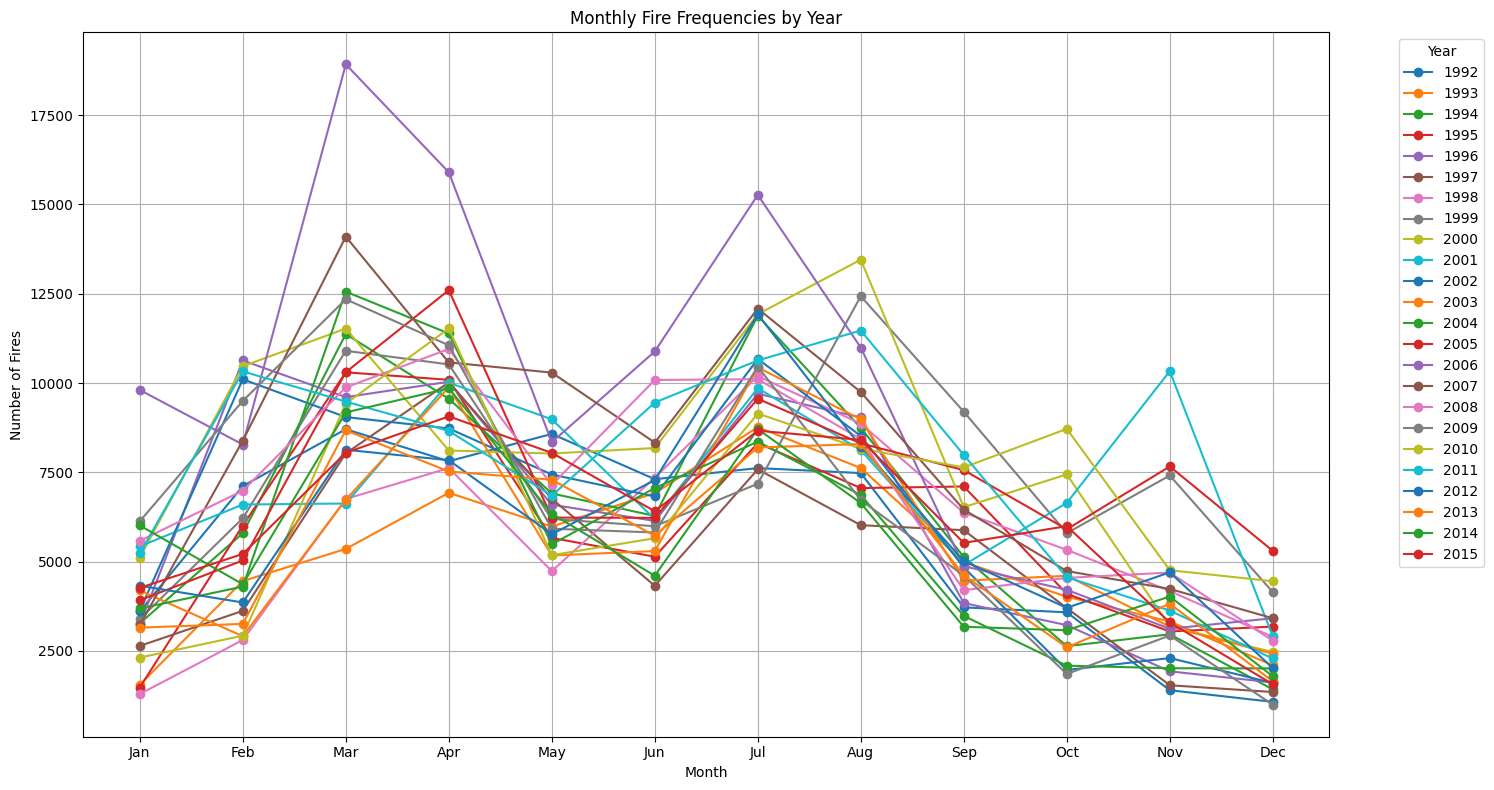

Monthly fire frequencies plot saved at: ./Abbildungen/monthly_fire_frequency_by_year.png


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File paths
monthly_file = './Data_Waldbrand_Zeitreihen/monthly_fire_counts.csv'

# Load and rename the monthly fire counts data
monthly_data = pd.read_csv(monthly_file)
monthly_data.rename(columns={"DISCOVERY_DATE": "Date", "Monthly Fire Counts": "Fire_Count"}, inplace=True)
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
monthly_data['Year'] = monthly_data['Date'].dt.year
monthly_data['Month'] = monthly_data['Date'].dt.month

# Group data by month and year
monthly_grouped = monthly_data.groupby(['Year', 'Month']).agg({'Fire_Count': 'sum'}).reset_index()

# Create a pivot table for plotting
pivot_data = monthly_grouped.pivot(index='Month', columns='Year', values='Fire_Count')

# Plot the monthly fire frequencies for each year
plt.figure(figsize=(15, 8))
pivot_data.plot(ax=plt.gca(), marker='o')
plt.title('Monthly Fire Frequencies by Year')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot for monthly fire frequencies
monthly_lineplot_path = './Abbildungen/monthly_fire_frequency_by_year.png'
plt.tight_layout()
plt.savefig(monthly_lineplot_path, dpi=300)
plt.show()

print(f"Monthly fire frequencies plot saved at: {monthly_lineplot_path}")
